# Lecture 19 - Distance Metrics, Dimensionality Reduction, and Clustering

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Announcements:
* Faculty candidate talks:
  * Thursday 4pm CF 105 Research Talk
    * Title: Estimating Demand for Online Shopping using Limited Historical Observation
  * Friday 4pm CF 316 Teaching Demo
    * Title: Introduction to Algorithms for Graphs: Representations, and Search Algorithms
* FP groups formed by tonight - who needs a group?

#### Goals:
* Know the basic motivation for dimensionality reduction and clustering.
* Know how to compute the $L^p$ family of distance metrics, and understand the intuition for the special cases $L^0$, $L^1$, $L^2$, and $L^\infty$.
* Be able to interpret the results of Principal Components Analysis
* Know how the K-means clustering algorithm works
* Be able to use scikit-learn to perform dimensionality reduction (PCA) and clustering (K-Means).


###  Feature Extraction

The vast majority of machine learning methods assume each of your input datapoints is represented by a **feature vector**.

If it's not, it's usually your job to make it so - this is called **feature extraction**.

Given a DataFrame, we can treat each row as the feature vector for the thing the row describes. Traditionally, we arrange our dataset in an $N \times D$ matrix, where each **row** corresponds to a datapoint and each **column** corresponds to a single feature (variable). This is the same layout as a pandas table.

If your input is an audio signal, a sentence of text, an image, or some other not-obviously-vector-like thing, there may be more work to do.

Given a dataframe like the penguins dataset, it's pretty easy to get to a ML-style training dataset X, y:

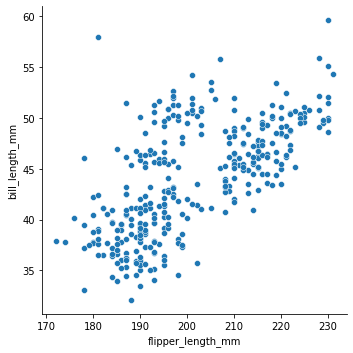

In [21]:
penguins = sns.load_dataset("penguins")
sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm")

In [22]:
X = penguins[["flipper_length_mm", "bill_length_mm"]].to_numpy()
X.shape

(344, 2)

In [23]:
X[:10,:]

array([[181. ,  39.1],
       [186. ,  39.5],
       [195. ,  40.3],
       [  nan,   nan],
       [193. ,  36.7],
       [190. ,  39.3],
       [181. ,  38.9],
       [195. ,  39.2],
       [193. ,  34.1],
       [190. ,  42. ]])

In [25]:
penguins["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [26]:
y = penguins["species"].map({"Gentoo": 1, "Adelie": 2, "Chinstrap": 3}).to_numpy()
y.shape

(344,)

In [27]:
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Unsupervised Learning

Goal: discover **structure** without any ground-truth labels.

What might we mean by **structure**? A non-exhaustive list:
  * Intrinsic dimensionality / the lower-dimensional manifold in which the data lives
  * Natural groupings based on proximity

## Thinking in High-Dimensional Space

This is hard, and our intuition tends to fall apart. **However**, real high-dimensional data often lies on a *lower-dimensional* **manifold**. 

What the heck does that mean?

If you sliced, rotated, projected, warped, etc. your space in just the right ways, you could represent the same information with fewer dimensions. The smallest possible number of dimensions possible to represent your data is called its *intrinsic dimensionality*.

## Dimensionality Reduction

Ways to get your $n$ feature vectors from $d$ dimensions to $d'$ dimensions (where $d' < d$).

Good for:
* Visualizing higher-dimensional data in 2D or 3D
* Finding (approximate) intrinsic dimensionality
* Speeding up your ML pipeline by reducing $d$

in all cases, these likely come at the expense of some accuracy.

Here are two common approches that are limited to **linear** notions of stretching, slicing, warping, etc:

### Principal Components Analysis

Reduces dimensionality by finding $d'$ new features (each is a linear combination of the old features) that **explain as much variance as possible**.

### Random Projections

Reduces dimensionality by multiplying $X_{n \times d}$ by a **random** matrix $P_{d \times d'}$, resulting in a reduced-dimensionality dataset $X'_{n \times d'}$.

Huh?

Somewhat surprisingly, this **works pretty well**. 

Question: What's our metric for "works"? 

Answer: It preserves pairwise distances between points.

## Distance Metrics

#### $L^p$ Distances
A common family of distance metrics is the $L^p$ distance:

$$d_p(a, b) = \sqrt[p]{\sum_{i=1}^d |a_i - b_i|^p}$$

When $p = 2$, this is the Euclidean distance we're all used to, based on the Pythagorean theorem; in 2D, it reduces to: $$\sqrt{(b_x - a_x)^2 + (b_y - a_y^2)}$$

Different values of $p$ give different behavior: 
* For smaller $p$, we care less about how different the per-dimension differences are from each other.
* For larger $p$, we care more about how different the per-dimension differences are from each other.

A few examples of the "unit circle" under different $L^p$ distances:
![](https://fw.cs.wwu.edu/~wehrwes/courses/data311_23w/lectures/L19/lp_distances.png)

$L_1$ and $L_2$ are by far the most common choices here.

#### Hamming Distance

For vectors of categorical values, Hamming distance is the number of dimensions in which two vectors differ: 
$$d(a, b) = \sum_i \mathbb{1}(a_i \ne b_i)$$
where $\mathbb{1}(\cdot)$ is an indicator function that has value 1 if its argument is true and 0 otherwise.

#### Cosine Similarity

A similarity (not distance) metric that considers only vector direction, not magnitude:

$$ sim(a, b) = \cos \theta = \frac{a^Tb}{\sqrt{(a^Ta)(b^Tb)}}$$

#### The curse of dimensionality, very briefly
It's worth noting that many distance metrics become less and less useful as $d$ gets larger. There are a few ways to think about this, but the simplest is just that more dimensions means more opportunities for points to be far apart.

Cosine similarity is often better in high dimensions this because it ignores magnitude.

### Principal Components Analysis

An example of using PCA on a synthetic dataset:

In [31]:
# Authors: Gael Varoquaux
#          Jaques Grobler
#          Kevin Hughes
# Adapted by Scott Wehrwein for DATA 311
# License: BSD 3 clause
%matplotlib inline
import sklearn
import sklearn.decomposition

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# #############################################################################
# Create the data

e = np.exp(1)
np.random.seed(4)


def pdf(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x) + stats.norm(scale=4 / e).pdf(x))


y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
z = np.random.normal(scale=0.1, size=len(x))

density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)

density *= pdf_z

a = x + y
b = 2 * y
c = a - b + z

norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm


# #############################################################################
# Do PCA and plot a figure showing the data and the plane spanned by the first 2
# PCs
def plot_figs(fig_num, elev, azim):
    Y = np.c_[a, b, c]

    pca = sklearn.decomposition.PCA(n_components=3)
    pca.fit(Y)
    V = pca.components_.T

    # from here on is just plotting stuff:
    fig = plt.figure(fig_num, figsize=(8, 5))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=elev, azim=azim)

    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker="+", alpha=0.4)


    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V
    x_pca_plane = np.r_[x_pca_axis[:2], -x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], -y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], -z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    print("Component Vectors (one per column):")
    print(pca.components_.T)
    print("Explained variance:")
    print(pca.explained_variance_)


Component Vectors (one per column):
[[-0.33847725 -0.7109608   0.61641536]
 [-0.77400604 -0.1621726  -0.61205775]
 [ 0.53511475 -0.68427684 -0.49539622]]
Explained variance:
[1.0908032  0.41318925 0.00246436]


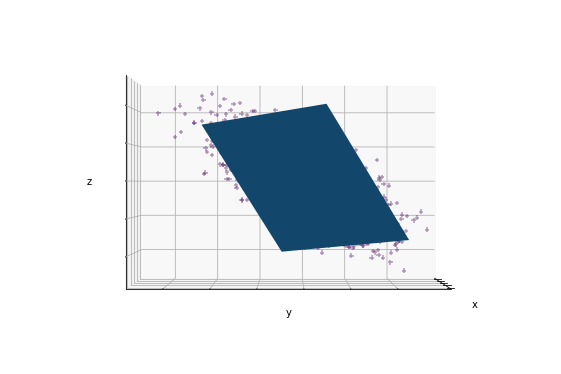

In [32]:
plot_figs(1, 0, 0)

Component Vectors (one per column):
[[-0.33847725 -0.7109608   0.61641536]
 [-0.77400604 -0.1621726  -0.61205775]
 [ 0.53511475 -0.68427684 -0.49539622]]
Explained variance:
[1.0908032  0.41318925 0.00246436]


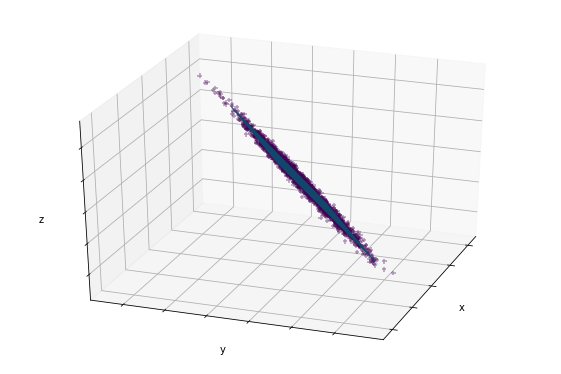

In [33]:
elev = 30
azim = 20
plot_figs(2, elev, azim)

plt.show()

## Clustering

Find clusters of points based on proximity, density, or other similar metrics.

Example algorithm: K means

Demo: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/




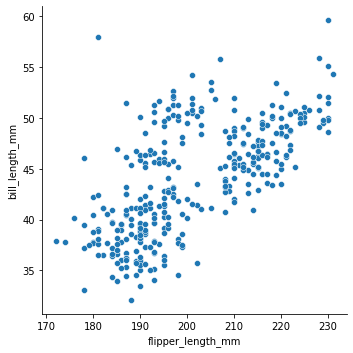

In [34]:
penguins = sns.load_dataset("penguins")
sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm")

In [36]:
Xdf = penguins[["flipper_length_mm", "bill_length_mm"]].dropna()
X = Xdf.to_numpy()
X.shape

(342, 2)

In [37]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

Xdf["cluster"] = kmeans.labels_

Xdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flipper_length_mm  342 non-null    float64
 1   bill_length_mm     342 non-null    float64
 2   cluster            342 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 9.4 KB


In [38]:
kmeans.cluster_centers_

array([[196.7311828 ,  45.95483871],
       [216.88372093,  47.56744186],
       [186.99166667,  38.4275    ]])

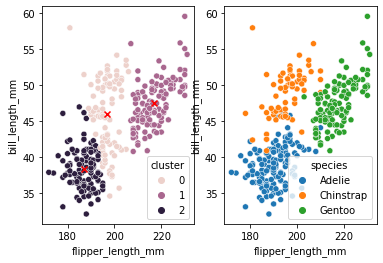

In [39]:
fig = plt.figure()
plt.subplot(1,2,1)
sns.scatterplot(data=Xdf, x="flipper_length_mm", y="bill_length_mm", hue="cluster")
plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], c="red", marker="x")
plt.subplot(1,2,2)
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")
plt.show()

In [ ]:
sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")